## Atlantic Cod in New England Data Challenge

##### Drew Cistola

#### Import Cod Dataset, Pandas, and Matplotlib

In [25]:
import pandas as pnd
import matplotlib.pyplot as plt
cod = pnd.read_csv("C:/Users/drewc/Documents/cod_landings.csv")
cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
year       75 non-null int64
state      75 non-null object
species    75 non-null object
pounds     75 non-null int64
dollars    75 non-null int64
dtypes: int64(3), object(2)
memory usage: 3.0+ KB


#### Group Dataset by Year and Plot Dollars and Pounds

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1988 to 2017
Data columns (total 2 columns):
pounds     9 non-null int64
dollars    9 non-null int64
dtypes: int64(2)
memory usage: 216.0 bytes


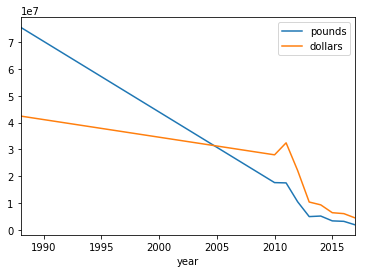

In [8]:
yr = cod.groupby(['year']).sum()
yr.plot()

#### Group Dataset by Year and State

In [27]:
yrst = cod.groupby(['year', 'state']).sum()
yrst.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1988, Connecticut) to (2017, Rhode Island)
Data columns (total 2 columns):
pounds     56 non-null int64
dollars    56 non-null int64
dtypes: int64(2)
memory usage: 1.2+ KB


#### Reset Index so that new Groups are Column Names

In [12]:
yrstl = yrst.reset_index(level=['year', 'state'])
yrstl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
year       56 non-null int64
state      56 non-null object
pounds     56 non-null int64
dollars    56 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


#### Convert Dataset from Long to Wide for Dollars

In [22]:
yrstd = yrstl.pivot(index='state', columns='year', values='dollars')
yrstd.head(n=7)

year,1988,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,,
Connecticut,168630.0,9459.0,4.0,14223.0,109.0,1131.0,3819.0,48890.0,2299.0
Maine,4033556.0,1388716.0,1617500.0,1234332.0,737685.0,884371.0,496878.0,341501.0,218948.0
Maryland,NaN,259.0,173.0,174.0,NaN,NaN,NaN,NaN,NaN
Massachusetts,35032227.0,23998994.0,27582585.0,18550352.0,8376560.0,7493636.0,5528195.0,5164264.0,3774367.0
New Hampshire,1630845.0,2186438.0,2499574.0,1750161.0,546314.0,571297.0,93296.0,108694.0,148949.0
New Jersey,8812.0,762.0,4356.0,1803.0,2136.0,331.0,133.0,2638.0,NaN
Rhode Island,1577813.0,410127.0,758667.0,582177.0,722988.0,382004.0,281061.0,393896.0,278573.0


#### Make Variables for each state location in Data Frame

In [15]:
ME = yrstd.loc['Maine']
MA = yrstd.loc['Massachusetts']
CT = yrstd.loc['Connecticut']
RI = yrstd.loc['Rhode Island']
NH = yrstd.loc['New Hampshire']
NJ = yrstd.loc['New Jersey']
MD = yrstd.loc['Maryland']
yrsd = yrstd.columns

#### Make Plot with Each State, Labels, and Legends

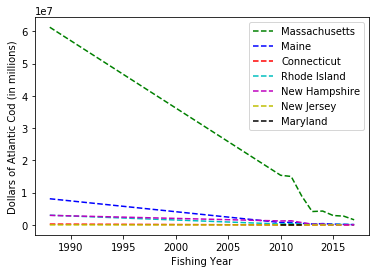

In [28]:
plt.plot(yrsd, MA, 'g--')
plt.plot(yrsd, ME, 'b--')
plt.plot(yrsd, CT, 'r--')
plt.plot(yrsd, RI, 'c--')
plt.plot(yrsd, NH, 'm--')
plt.plot(yrsd, NJ, 'y--')
plt.plot(yrsd, MD, 'k--')
plt.ylabel('Dollars of Atlantic Cod (in millions)')
plt.xlabel('Fishing Year')
plt.legend()

#### Repeat Process for Pounds

In [23]:
yrstp = yrstl.pivot(index='state', columns='year', values='pounds')
yrstp.head(n=7)

year,1988,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,,
Connecticut,255500.0,5673.0,2.0,7256.0,39.0,523.0,1968.0,25660.0,937.0
Maine,8104100.0,748131.0,814077.0,492714.0,286298.0,404122.0,254594.0,166081.0,80572.0
Maryland,NaN,136.0,76.0,63.0,NaN,NaN,NaN,NaN,NaN
Massachusetts,61238900.0,15371543.0,15012062.0,8980225.0,4145406.0,4294491.0,2913481.0,2723903.0,1583103.0
New Hampshire,2960100.0,1226227.0,1286312.0,725454.0,229870.0,263360.0,44701.0,55161.0,70960.0
New Jersey,14900.0,305.0,1581.0,875.0,1015.0,138.0,71.0,1030.0,NaN
Rhode Island,3009300.0,279089.0,408866.0,271417.0,290386.0,195072.0,138926.0,209647.0,113229.0


In [19]:
ME = yrstp.loc['Maine']
MA = yrstp.loc['Massachusetts']
CT = yrstp.loc['Connecticut']
RI = yrstp.loc['Rhode Island']
NH = yrstp.loc['New Hampshire']
NJ = yrstp.loc['New Jersey']
MD = yrstp.loc['Maryland']
yrsp = yrstp.columns

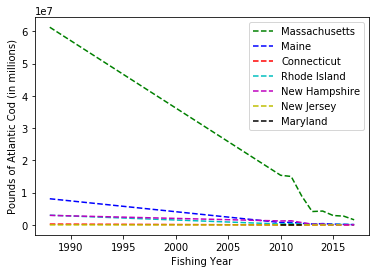

In [29]:
plt.plot(yrsp, MA, 'g--')
plt.plot(yrsp, ME, 'b--')
plt.plot(yrsp, CT, 'r--')
plt.plot(yrsp, RI, 'c--')
plt.plot(yrsp, NH, 'm--')
plt.plot(yrsp, NJ, 'y--')
plt.plot(yrsp, MD, 'k--')
plt.ylabel('Pounds of Atlantic Cod (in millions)')
plt.xlabel('Fishing Year')
plt.legend()